### SWW Data Processing Attempt

In [1]:
import numpy as np
import scipy
import matplotlib.pyplot as plt
import matplotlib
import scipy.signal.windows as windows

from scipy.fft import fft, fftshift, ifft, ifftshift, fftfreq
from scipy.constants import c, pi

matplotlib.style.use('bmh')

In [2]:
rx_buffer1 = np.load("rx_buffer_2_300_310_1_run_1.npy")
rx_buffer2 = np.load("rx_buffer_2_300_310_1_run_1.npy")

In [27]:
fs = 2e6
LOs = np.unique(rx_buffer1[:,1])
print(LOs)
nsp = len(LOs)
N = min(rx_buffer1[rx_buffer1[:, 1] == LOs[i], 0].shape[0] for i in range(nsp))
W = windows.boxcar(N)

[3.01e+08+0.j 3.02e+08+0.j 3.03e+08+0.j 3.04e+08+0.j 3.05e+08+0.j
 3.06e+08+0.j 3.07e+08+0.j 3.08e+08+0.j 3.09e+08+0.j]


In [4]:
for i in range(nsp):
    print(i, len(rx_buffer1[rx_buffer1[:,1]==LOs[i], 0]))

0 501840
1 501840
2 501840
3 501840
4 501840
5 501840
6 503880
7 503880
8 501840


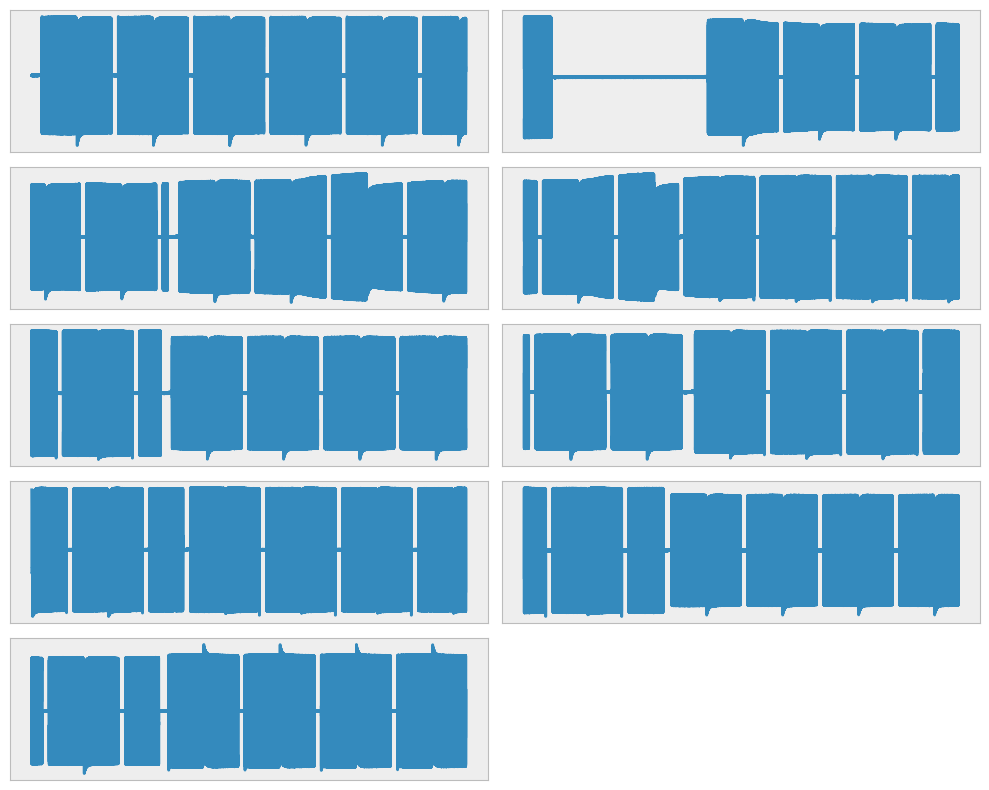

In [5]:
num_plots = nsp
num_cols = 2  # You can adjust the number of columns as needed
num_rows = int(np.ceil(num_plots / num_cols))

fig, axes = plt.subplots(num_rows, num_cols, figsize=(10, 8))
axes = np.array(axes).flatten()

for i, value in enumerate(LOs):
    ax = axes[i] 
    ax.plot(rx_buffer1[rx_buffer1[:,1]==value, 0].real)  # Replace with your actual data
    
    ax.set_xticks([])
    ax.set_yticks([])
    ax.set_xticklabels([])
    ax.set_yticklabels([])

for j in range(num_plots, num_rows * num_cols):
    fig.delaxes(axes[j])

plt.tight_layout()

plt.show()

In [18]:
first_arr1 = rx_buffer1[rx_buffer1[:,1]==LOs[1], 0]
first_arr2 = rx_buffer2[rx_buffer1[:,1]==LOs[1], 0]

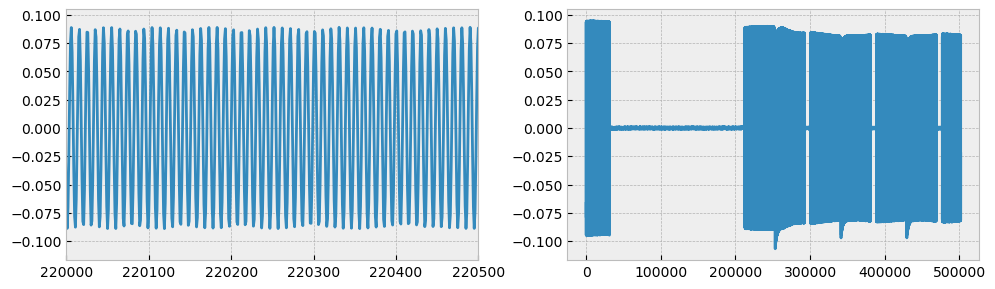

In [25]:
f, ax = plt.subplots(1,2, figsize = (10,3))
ax[0].plot(first_arr1.real)
ax[1].plot(first_arr2.real)

ax[0].set_xlim([220000,220500])
plt.tight_layout()
plt.show()

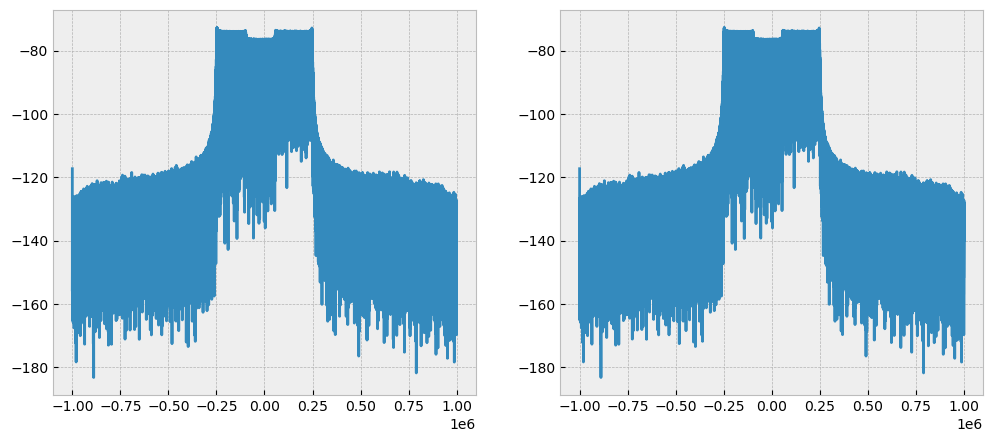

In [20]:
fourier1 = fftshift(fft(first_arr1*W))
mag_rx1 = 10*np.log10(np.abs(fourier1)**2/(N*fs))

fourier2 = fftshift(fft(first_arr2*W))
mag_rx2 = 10*np.log10(np.abs(fourier2)**2/(N*fs))

freqs = fftshift(fftfreq(N, 1/fs)) #Frequency range

f, ax = plt.subplots(1,2, figsize = (12,5))
ax[0].plot(freqs, mag_rx1)
ax[1].plot(freqs, mag_rx2)
plt.show()

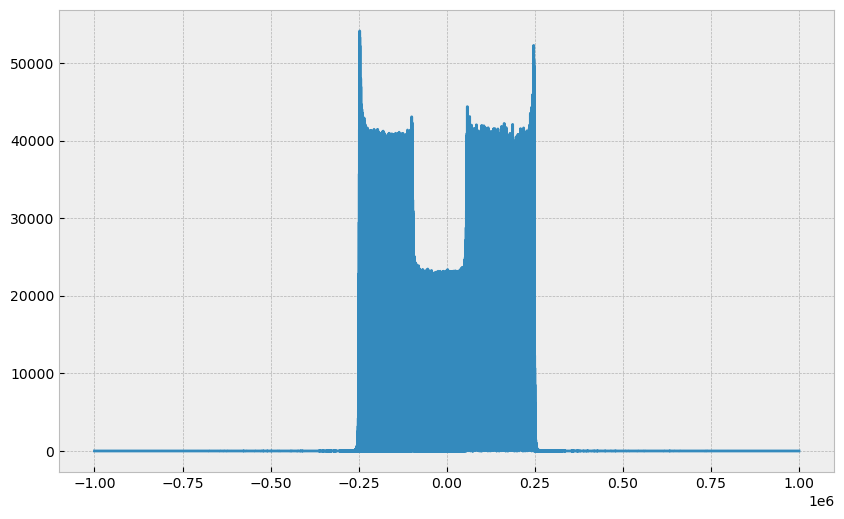

In [21]:
mf_dft = fourier1 * np.conjugate(fourier2)

f, ax = plt.subplots(figsize = (10,6))

ax.plot(freqs, np.abs(mf_dft))
plt.show()

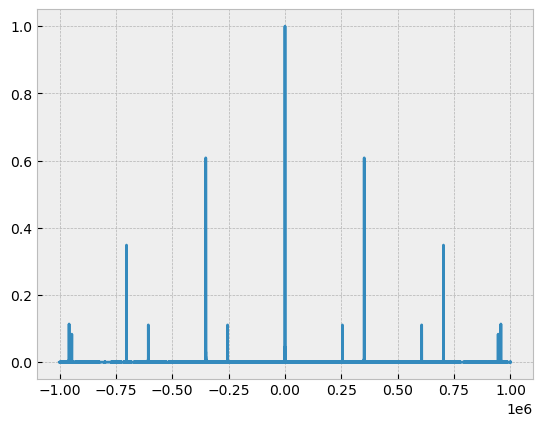

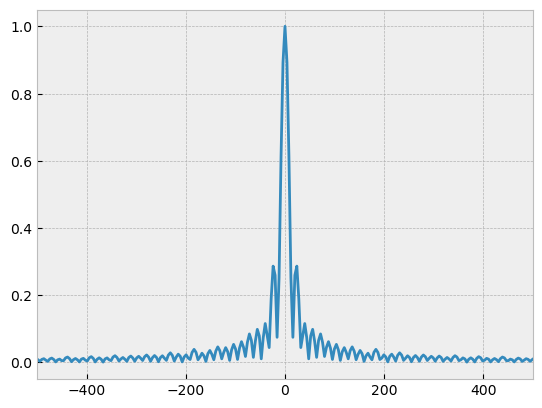

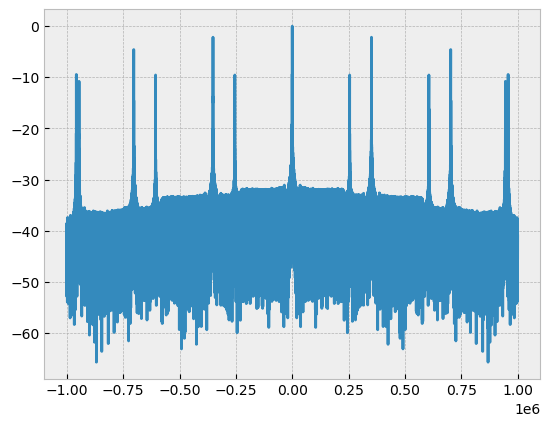

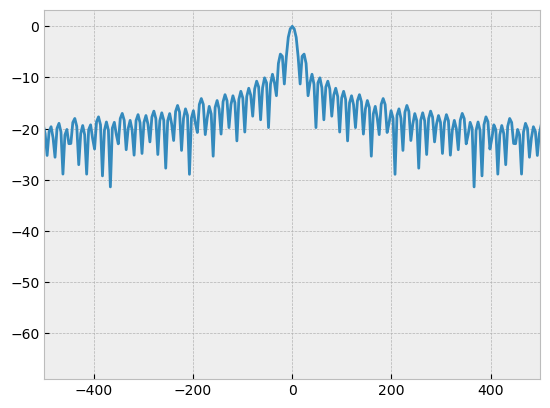

In [22]:
mf_idft = ifftshift(ifft(mf_dft))
mf_idft /= np.max(mf_idft)
p = 10*np.log10(np.abs(mf_idft))

plt.plot(freqs, np.abs(mf_idft))
plt.show()

plt.plot(freqs, np.abs(mf_idft))
plt.xlim(-0.0005e6, 0.0005e6)
plt.show()

plt.plot(freqs,p)
plt.show()

plt.plot(freqs,p)
plt.xlim(-0.0005e6, 0.0005e6)
plt.show()